In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Dataset_T.csv')
data

,PLAN_INTERES,ID,Gender,Age,NIVEL_INTERES,TIPO_PROGRAMA,MODALIDAD,OFRECIO_APOYO,POR_OFERTADO,PROMEDIO,CANAL,"Dirección (binario, U= capital, R=provincia)",Estado Civil,MOTIVO_DESCARTE
0,Especialidad en Innovación,274576,M,44,Especialidad,EN LINEA,Ejecutivo,0,0,72,Digital - Facebook,U,1,Costo
1,Especialidad en Innovación,340962,M,43,Especialidad,EN LINEA,Ejecutivo,1,40,75,Digital - Facebook,U,0,Prefiere presencial
2,Especialidad en Innovación,370676,F,43,Especialidad,EN LINEA,Ejecutivo,1,40,80,Digital - Facebook,U,0,Duración
3,Especialidad en Innovación,420035,M,43,Especialidad,EN LINEA,Ejecutivo,1,40,79,Presencial - Campus,U,1,Eligio otra escuela
4,Especialidad en Innovación,434520,F,30,Especialidad,EN LINEA,Ejecutivo,1,40,77,Digital - Facebook,U,0,Costo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Maestría en Educación,601396,F,32,Maestría,EN LINEA,Ejecutivo,0,0,84,Digital - Facebook,R,1,Costo
145,Maestría en Educación,751888,F,42,Maestría,EN LINEA,Ejecutivo,1,30,85,Presencial - Campus,U,0,Prefiere presencial
146,Maestría en Gestión de Tecnologías de Información,345549,F,34,Maestría,EN LINEA,Ejecutivo,1,40,83,Digital - Google,U,0,Prefiere presencial
147,Maestría en Gestión de Tecnologías de Información,800322,M,41,Maestría,EN LINEA,Ejecutivo,1,50,76,Digital - Facebook,U,1,Duración


In [34]:
X = data.iloc[:, [8, 9]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


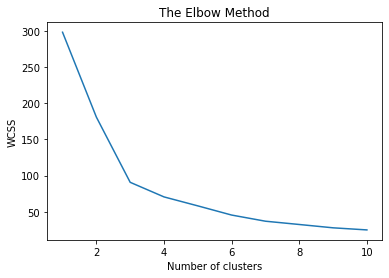

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

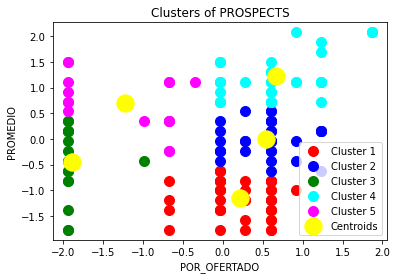

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of PROSPECTS')
plt.xlabel('POR_OFERTADO')
plt.ylabel('PROMEDIO')
plt.legend()
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
X = data.iloc[:, [9, 13]].values
labelencoder_X= LabelEncoder()
X[:,1]= labelencoder_X.fit_transform(X[:,1])
X = sc.fit_transform(X)

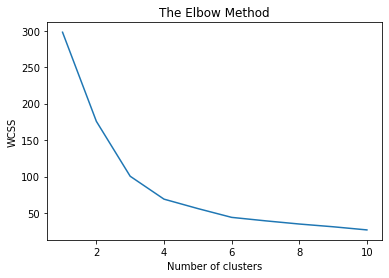

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

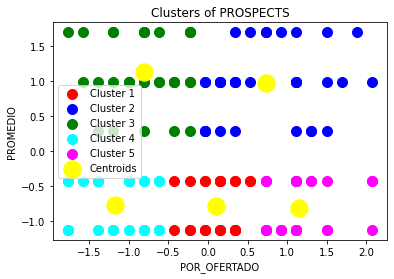

In [42]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of PROSPECTS')
plt.xlabel('POR_OFERTADO')
plt.ylabel('PROMEDIO')
plt.legend()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
X = data.iloc[:, [8, 9, 13]].values
labelencoder_X= LabelEncoder()
X[:,2]= labelencoder_X.fit_transform(X[:,2])
X = sc.fit_transform(X)


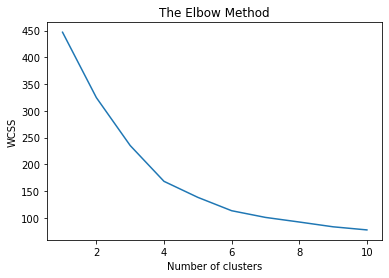

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

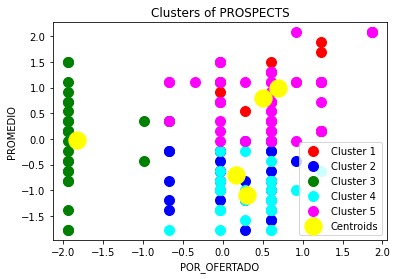

In [46]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of PROSPECTS')
plt.xlabel('POR_OFERTADO')
plt.ylabel('PROMEDIO')
plt.legend()
plt.show()

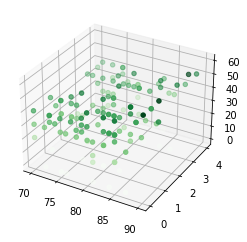

In [26]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points

zdata = X[:,0]
xdata = X[:,1]
ydata = X[:,2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

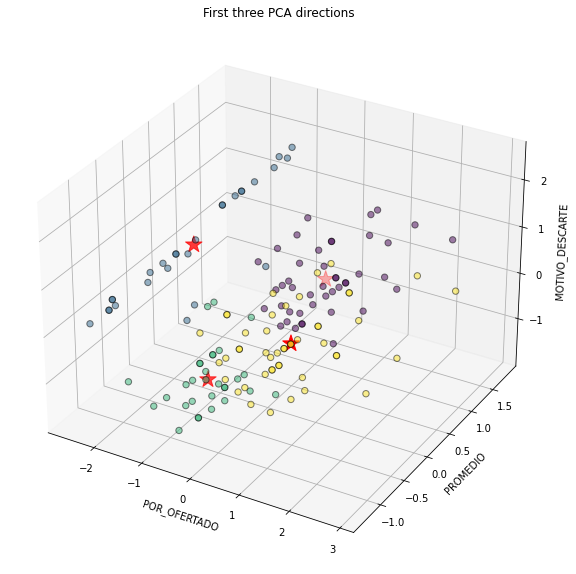

In [47]:
from sklearn.decomposition import PCA
pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(X)
kmeans_PCA = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")
ax.set_xlabel("POR_OFERTADO")
ax.set_ylabel("PROMEDIO")
ax.set_zlabel("MOTIVO_DESCARTE")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()